In [1]:
import numpy as np
import rasterio

In [2]:
def slice_image(image, patch_size):
    """
    Slices the image into patches.
    """

    height, width = image.shape[:2]
    patches = []

    for i in range(0, height, patch_size):
        for j in range(0, width, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patches.append(patch)
    
    return np.array(patches)

def load_image_from_path(path):
    """
    Loads an image from a path.
    """
    with rasterio.open(path) as src:
        return src.read()

In [3]:
image_path = "../Task1/img/image.png"

image = load_image_from_path(image_path)
target_img_size=128

image = np.swapaxes(image, 0,1)
image = np.swapaxes(image, 1,2)

# cut of edges so image shape is divisible by target_img_size
reduced_image = image[:-(image.shape[0]%target_img_size), :-(image.shape[1]%target_img_size)]

/Users/christianstubbe/Developer/architecture-of-ml-systems/.venv/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [6]:

# calculate number of patches
N = reduced_image.shape[0]//target_img_size*reduced_image.shape[1]//target_img_size

# initialize target array
target_array = np.zeros((N, target_img_size, target_img_size, reduced_image.shape[-1]))

# fill target array
for row in range(target_img_size):
    for col in range(target_img_size):
        # calculate row and column indices
        row_filter = range(row,reduced_image.shape[0]+row,target_img_size)
        col_filter = range(col,reduced_image.shape[1]+col,target_img_size)

        # write values into target array
        target_array[:, row, col, :] = reduced_image[row_filter][:,col_filter,:].reshape(-1, reduced_image.shape[-1])

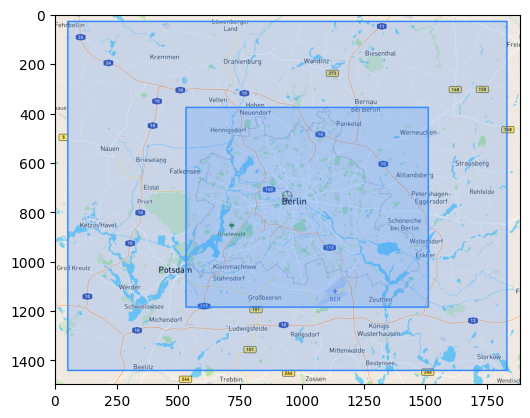

In [8]:
plt.imshow(image)

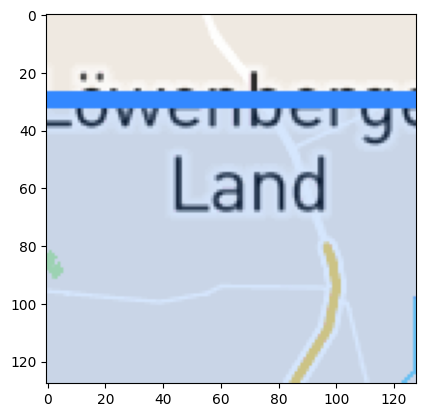

In [7]:
import matplotlib.pyplot as plt
plt.imshow(target_array[5,:,:,:].astype(int))